In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', logger=display)
analysis.load_data()

//anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the predictor to be the avg temperature value.

The features will be the year, month, and day of the current observation as well as the predictor value.

In [2]:
predictor = 'actual_mean_temp'
analysis.data['year'] = analysis.data['date'].dt.year
analysis.data['month'] = analysis.data['date'].dt.month
analysis.data['day'] = analysis.data['date'].dt.day
features = ['year', 'month', 'day', predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1826.732, BIC=1859.823, Fit time=1.906 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1970.990, BIC=2000.405, Fit time=0.585 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1835.876, BIC=1865.290, Fit time=1.827 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1827.981, BIC=1864.748, Fit time=1.776 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1984.405, BIC=2013.819, Fit time=1.426 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=1.283 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1830.330, BIC=1870.774, Fit time=6.519 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1817.437, BIC=1854.205, Fit time=2.677 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1

'Train Error: 1148.5822674  Num NaN: 0'

'Test Error: 4.75858276367    Num NaN: 0'

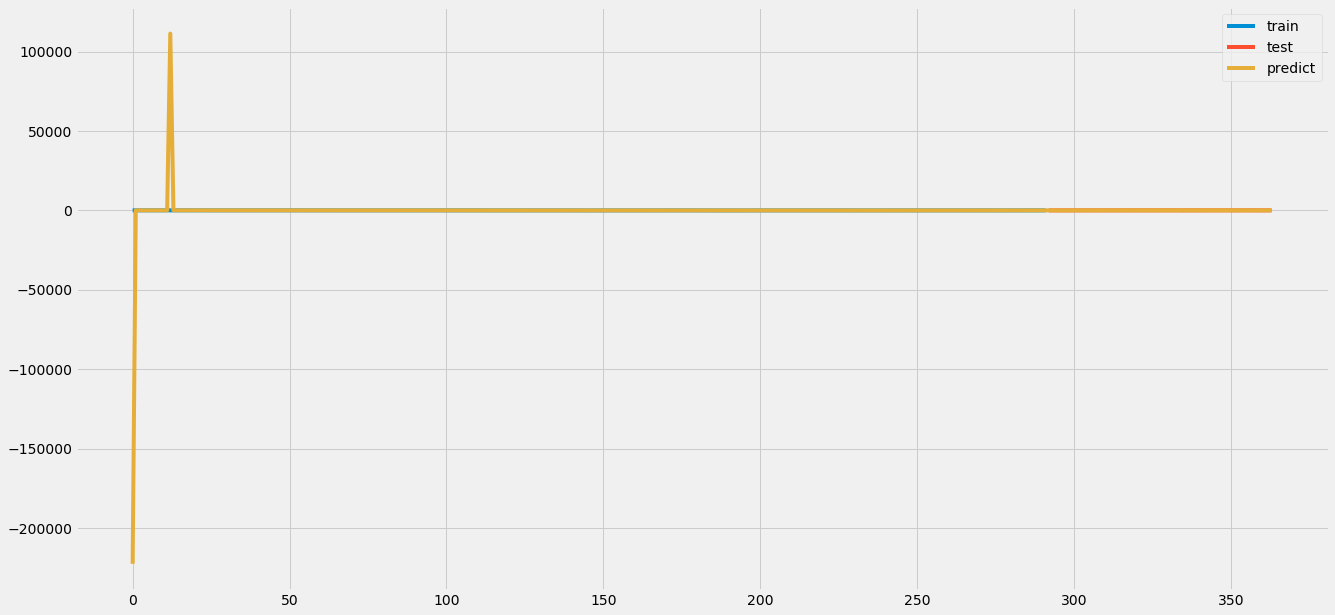

In [4]:
model = ARIMA(analysis)
analysis.run_model(model)

'Train Error: 4.25  Num NaN: 0'

'Test Error: 4.98333333333    Num NaN: 0'

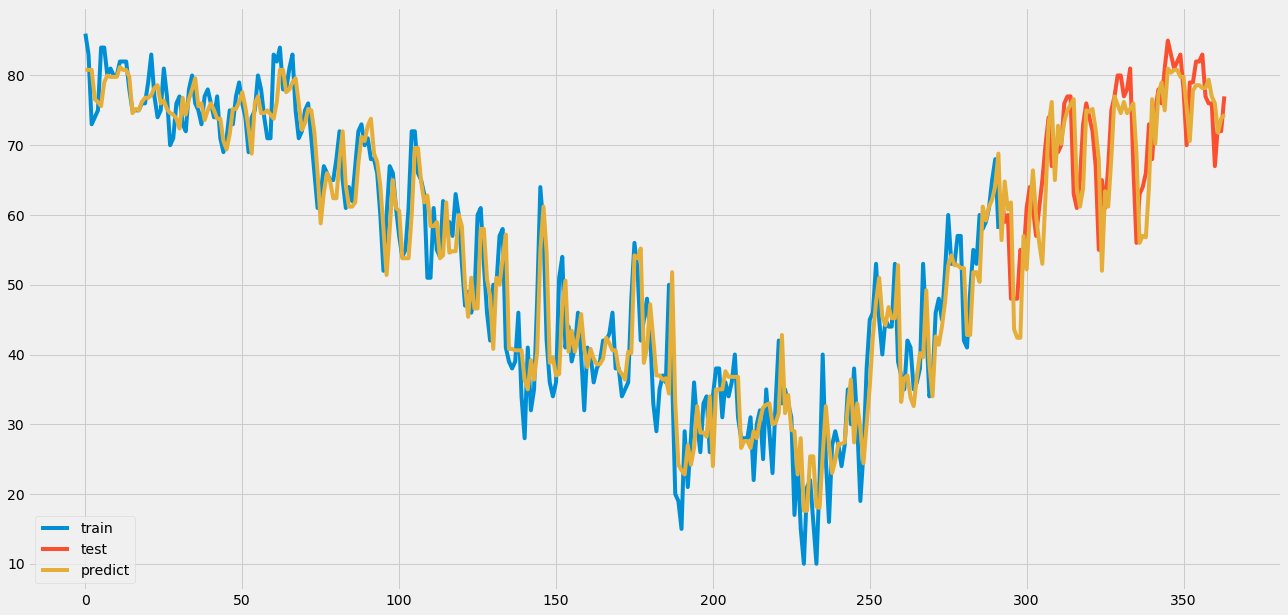

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model)

//anaconda/envs/python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 3.14519650325e+15  Num NaN: 0'

'Test Error: 3.12951489766e+15    Num NaN: 0'

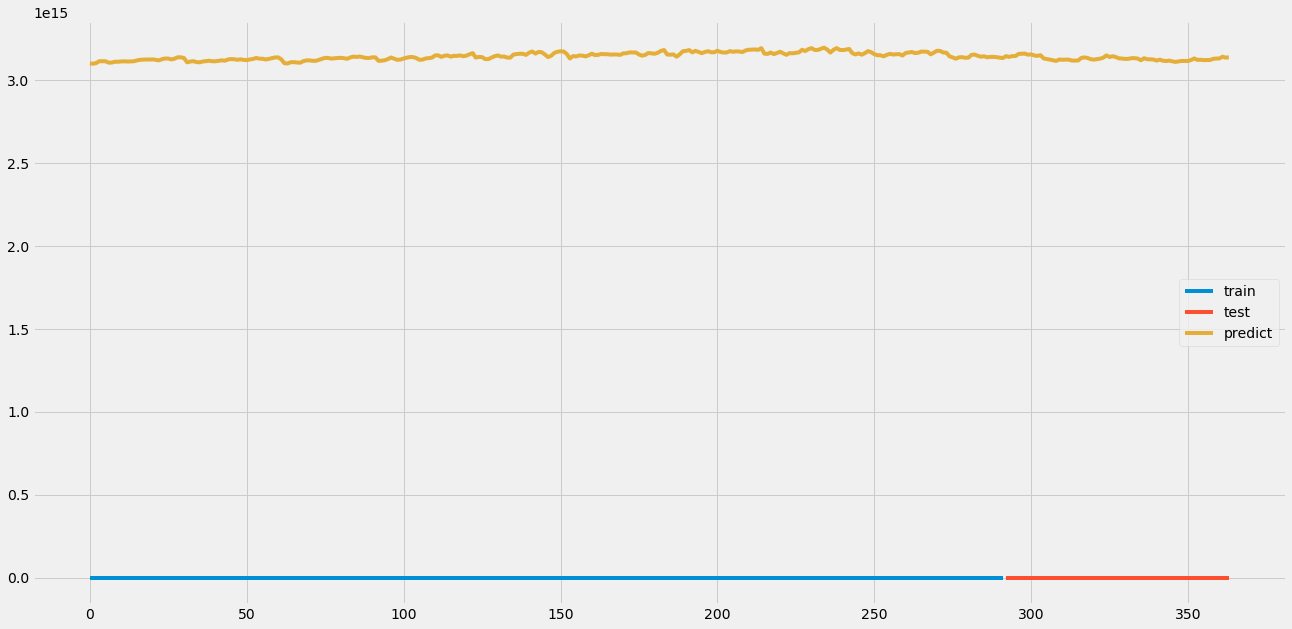

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model)

'Train Error: 1.97842465753  Num NaN: 0'

'Test Error: 4.86111111111    Num NaN: 0'

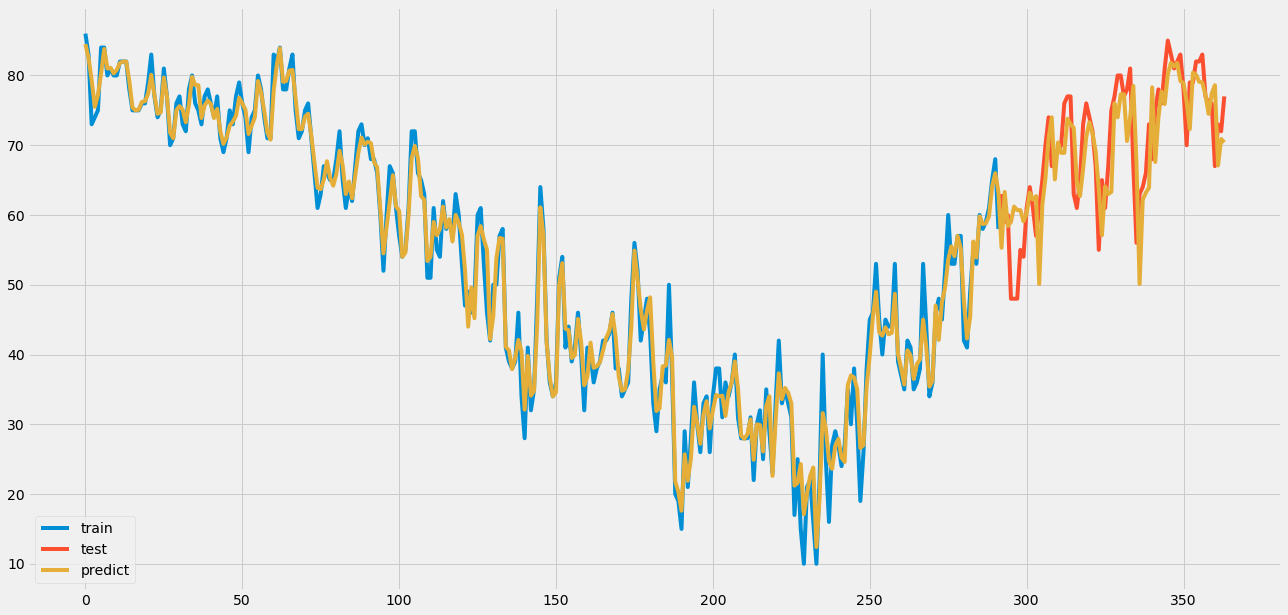

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model)

'Train Error: 4.45712347983  Num NaN: 0'

'Test Error: 4.54007599274    Num NaN: 0'

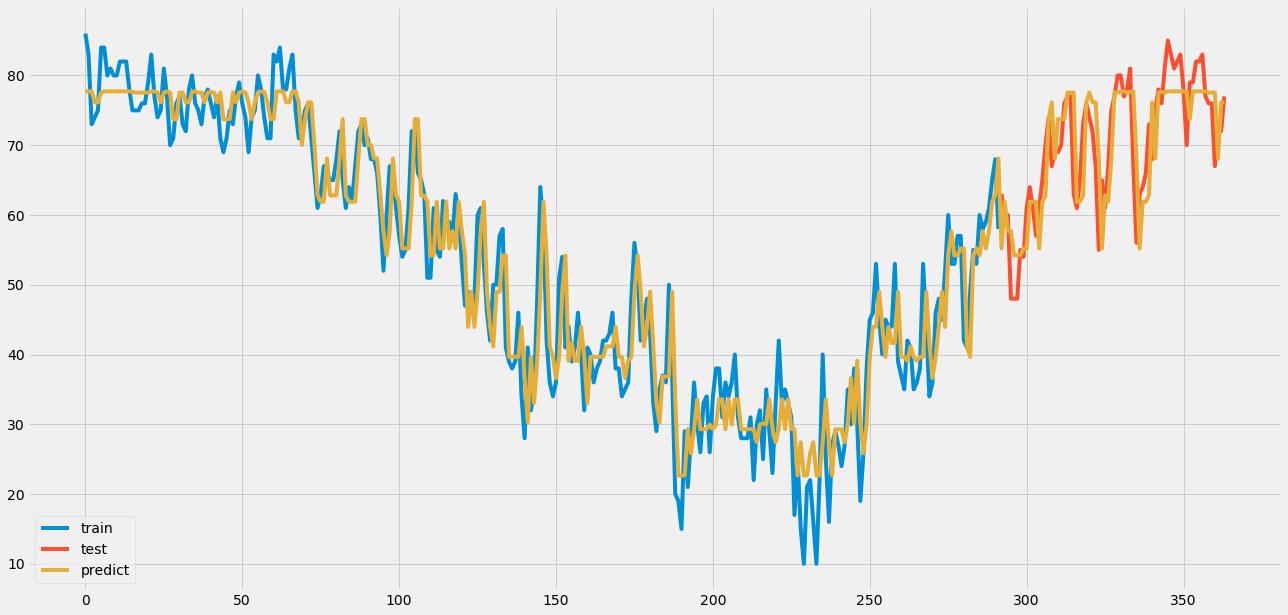

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model)

'Train Error: 3.80362052357e-09  Num NaN: 0'

'Test Error: 65.114388709    Num NaN: 0'

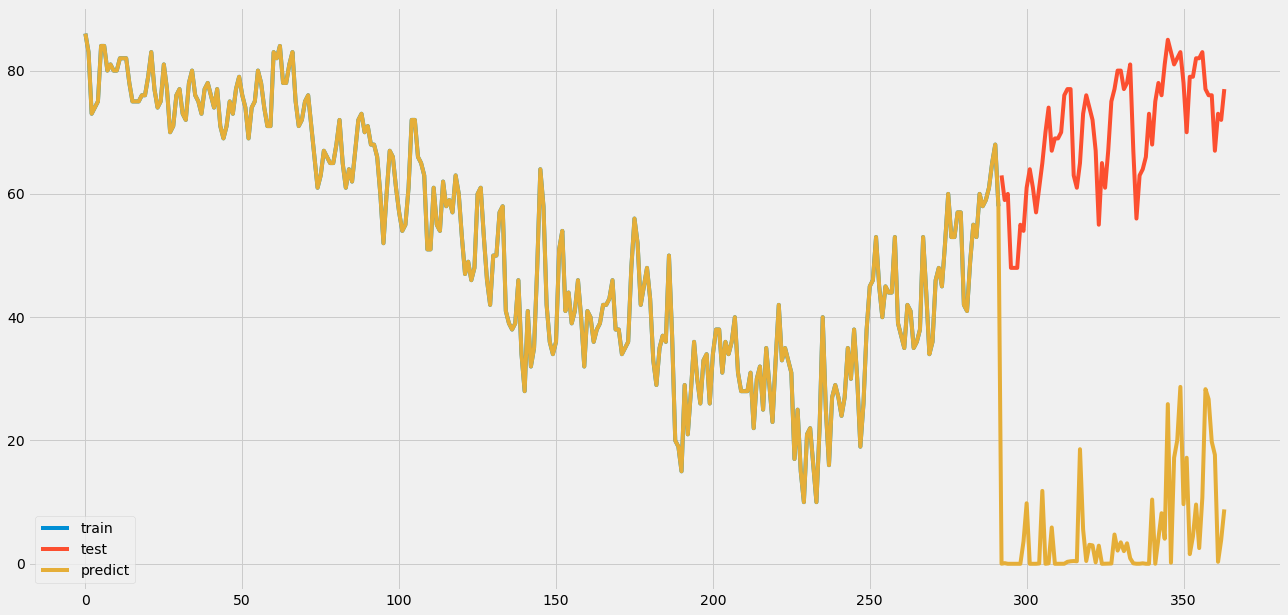

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model)

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



LinearRegression

'Train Error: 5.50764140049  Num NaN: 5'

'Test Error: 6.72045814343    Num NaN: 5'

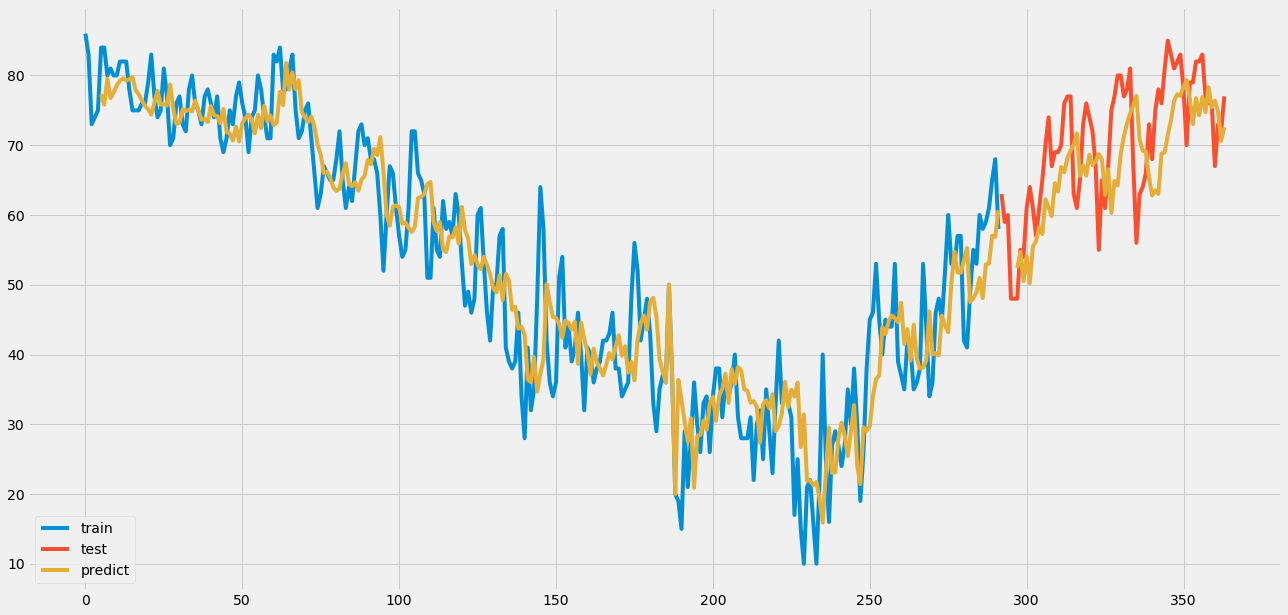

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model)

FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.2658 - val_loss: 0.1988
Epoch 2/10
 - 0s - loss: 0.2268 - val_loss: 0.2594
Epoch 3/10
 - 0s - loss: 0.2273 - val_loss: 0.3032
Epoch 4/10
 - 0s - loss: 0.2276 - val_loss: 0.3342
Epoch 5/10
 - 0s - loss: 0.2248 - val_loss: 0.3005
Epoch 6/10
 - 0s - loss: 0.2188 - val_loss: 0.2418
Epoch 7/10
 - 0s - loss: 0.2221 - val_loss: 0.2919
Epoch 8/10
 - 0s - loss: 0.2243 - val_loss: 0.2619
Epoch 9/10
 - 0s - loss: 0.2237 - val_loss: 0.1811
Epoch 10/10
 - 0s - loss: 0.2237 - val_loss: 0.3052


'Train Error: 16.5126797347  Num NaN: 5'

'Test Error: 22.8909764076    Num NaN: 5'

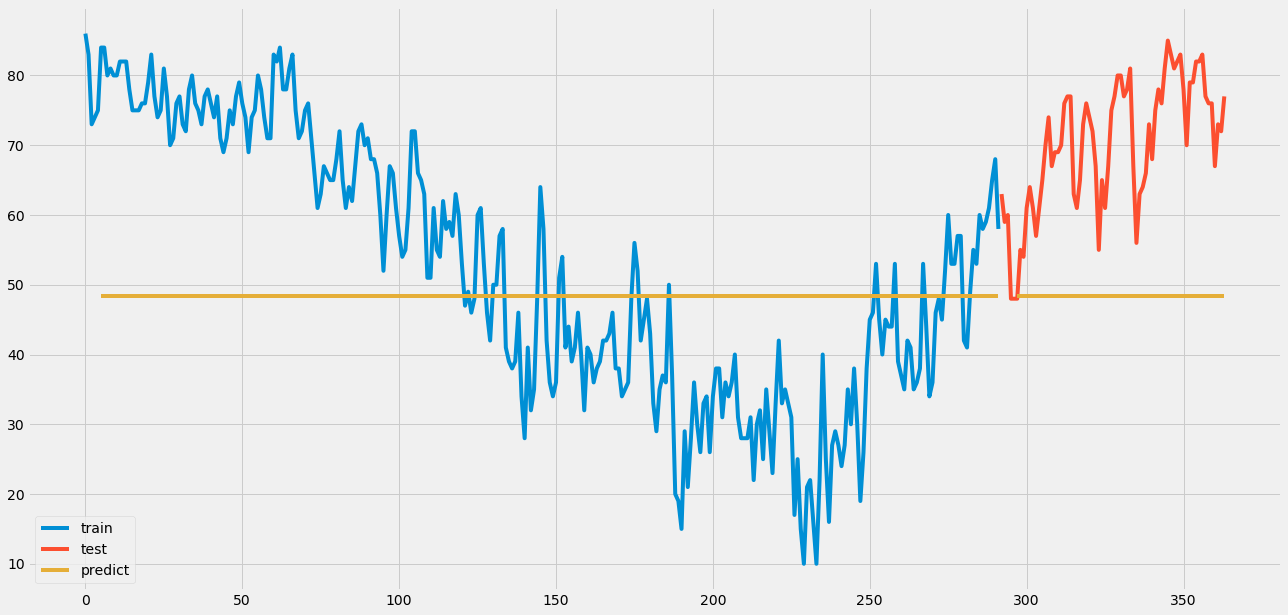

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model)


Recurrent Neural Network

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 1s - loss: 0.2497 - val_loss: 0.3654
Epoch 2/10
 - 0s - loss: 0.2428 - val_loss: 0.0985
Epoch 3/10
 - 0s - loss: 0.2397 - val_loss: 0.3198
Epoch 4/10
 - 0s - loss: 0.2408 - val_loss: 0.2693
Epoch 5/10
 - 0s - loss: 0.2419 - val_loss: 0.2506
Epoch 6/10
 - 0s - loss: 0.2376 - val_loss: 0.1078
Epoch 7/10
 - 0s - loss: 0.2429 - val_loss: 0.1206
Epoch 8/10
 - 0s - loss: 0.2457 - val_loss: 0.2474
Epoch 9/10
 - 0s - loss: 0.2441 - val_loss: 0.1101
Epoch 10/10
 - 0s - loss: 0.2529 - val_loss: 0.2434


'Train Error: 16.4974932255  Num NaN: 5'

'Test Error: 18.256276942    Num NaN: 5'

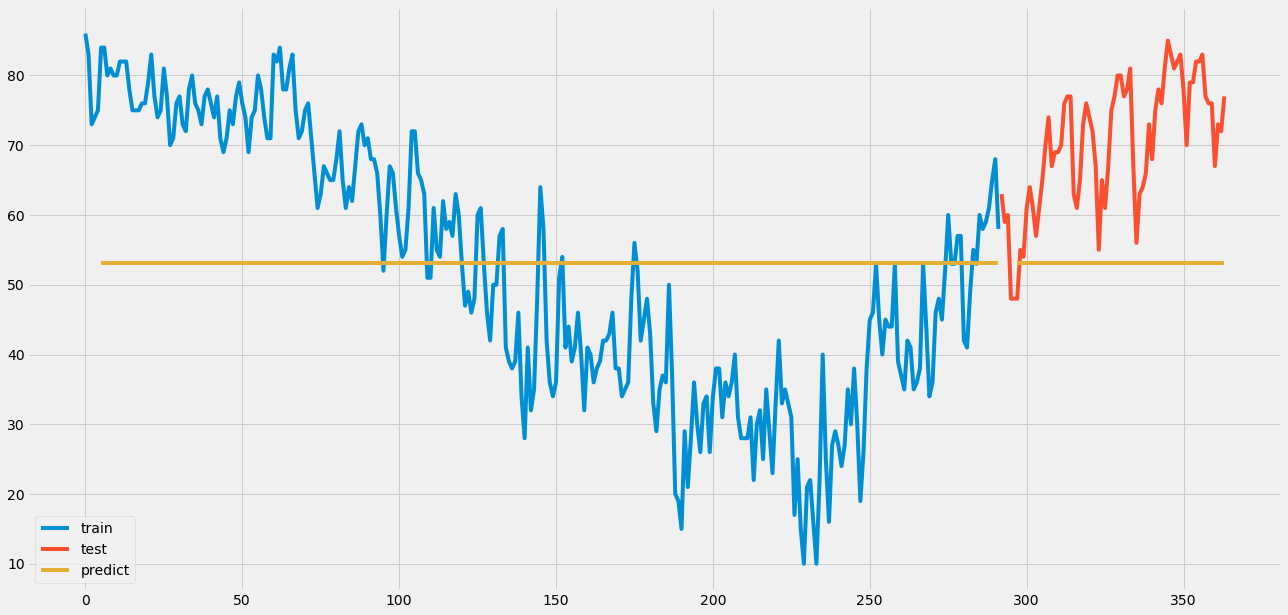

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

LSTM Network

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 0.8770 - val_loss: 0.6941
Epoch 2/10
 - 0s - loss: 0.6105 - val_loss: 0.5117
Epoch 3/10
 - 0s - loss: 0.4549 - val_loss: 0.3875
Epoch 4/10
 - 0s - loss: 0.3460 - val_loss: 0.2975
Epoch 5/10
 - 0s - loss: 0.2662 - val_loss: 0.2322
Epoch 6/10
 - 0s - loss: 0.2099 - val_loss: 0.1856
Epoch 7/10
 - 0s - loss: 0.1675 - val_loss: 0.1485
Epoch 8/10
 - 0s - loss: 0.1336 - val_loss: 0.1187
Epoch 9/10
 - 0s - loss: 0.1064 - val_loss: 0.0951
Epoch 10/10
 - 0s - loss: 0.0862 - val_loss: 0.0791


IndexError: index 295 is out of bounds for axis 1 with size 295

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model)